In [1]:
import pickle
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd ..

/workspaces/multilabel-benchmarks


In [3]:
DATA_DIR = pathlib.Path("data/generated")
dataset_files =  [f for f in DATA_DIR.iterdir() if f.suffix == ".pkl"]

In [4]:
def load_dataset(dataset_file):
    with open(dataset_file, "rb") as f:
        dataset = pickle.load(f)
    return dataset

def get_plot_args(dataset):

    X, true_labels_train, X_test, true_labels_test, labels, label_errors_mask, multiple_errors_mask_dict, ps, py, noise_matrix, m, n = [
        dataset["X_train"],
        dataset["true_labels_train"],
        dataset["X_test"],
        dataset["true_labels_test"],
        dataset["labels"],
        dataset["label_errors_mask"],
        dataset["multiple_errors_mask_dict"],
        dataset["ps"],
        dataset["py"],
        dataset["noise_matrix"],
        dataset["m"],
        dataset["n"],
    ]
    return X, true_labels_train, X_test, true_labels_test, labels, label_errors_mask, multiple_errors_mask_dict, ps, py, noise_matrix, m, n

def plot_dataset(*, X, labels, true_labels, noise_matrix, label_errors_mask, unique_labels, label_to_index):
    # Plot the features with and without label noise
    x_axis, y_axis = 0, 1

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.title("Features with label noise")
    plt.scatter(X[:, x_axis], X[:, y_axis], c=[label_to_index[tuple(label)] for label in labels])
    plt.subplot(2, 2, 2)
    plt.title("Features without label noise")
    plt.scatter(X[:, x_axis], X[:, y_axis], c=[label_to_index[tuple(label)] for label in true_labels])
    plt.subplot(2, 2, 4)
    plt.title("Label error mask")
    plt.scatter(X[:, x_axis], X[:, y_axis], c=label_errors_mask)


def main(dataset_files):
    for dataset_file in dataset_files:
        print(f"Loading {dataset_file}")
        dataset = load_dataset(dataset_file)
        X, true_labels_train, X_test, true_labels_test, labels, label_errors_mask, multiple_errors_mask_dict, ps, py, noise_matrix, m, n = get_plot_args(dataset)
        # Binarized labels to unique label indices
        unique_labels = np.unique(np.concatenate([true_labels_train, true_labels_test, labels]), axis=0)
        label_to_index = {tuple(label): i for i, label in enumerate(unique_labels)}
        plot_dataset(X=X, labels=labels, true_labels=true_labels_train, noise_matrix=noise_matrix, label_errors_mask=label_errors_mask, unique_labels=unique_labels, label_to_index=label_to_index) 
        plt.show()

Loading data/generated/small_dataset_0004.pkl


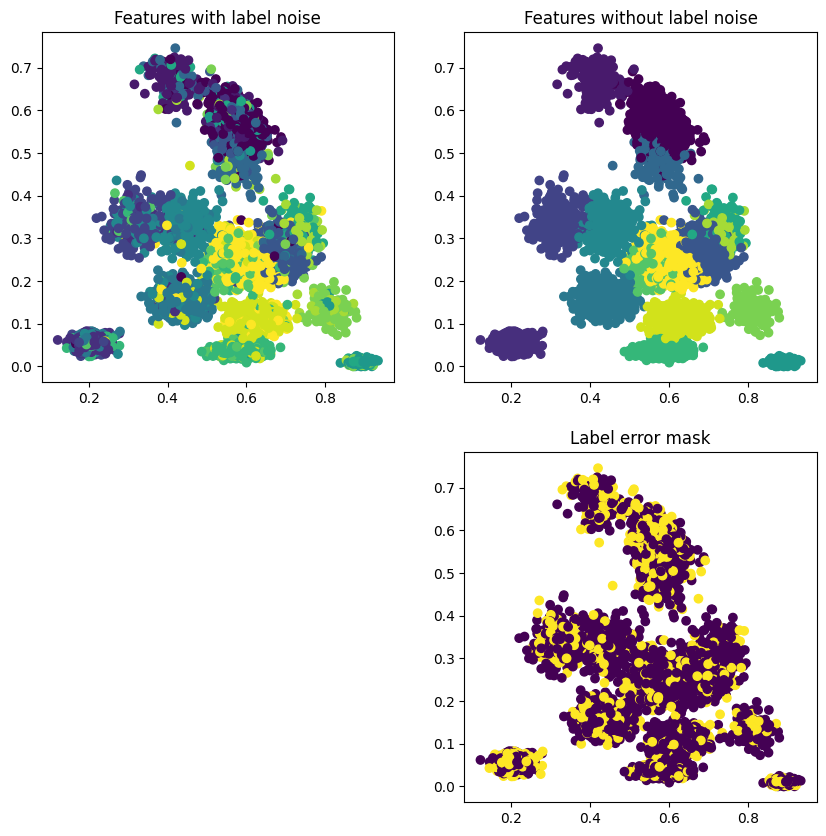

Loading data/generated/large_dataset_0005.pkl


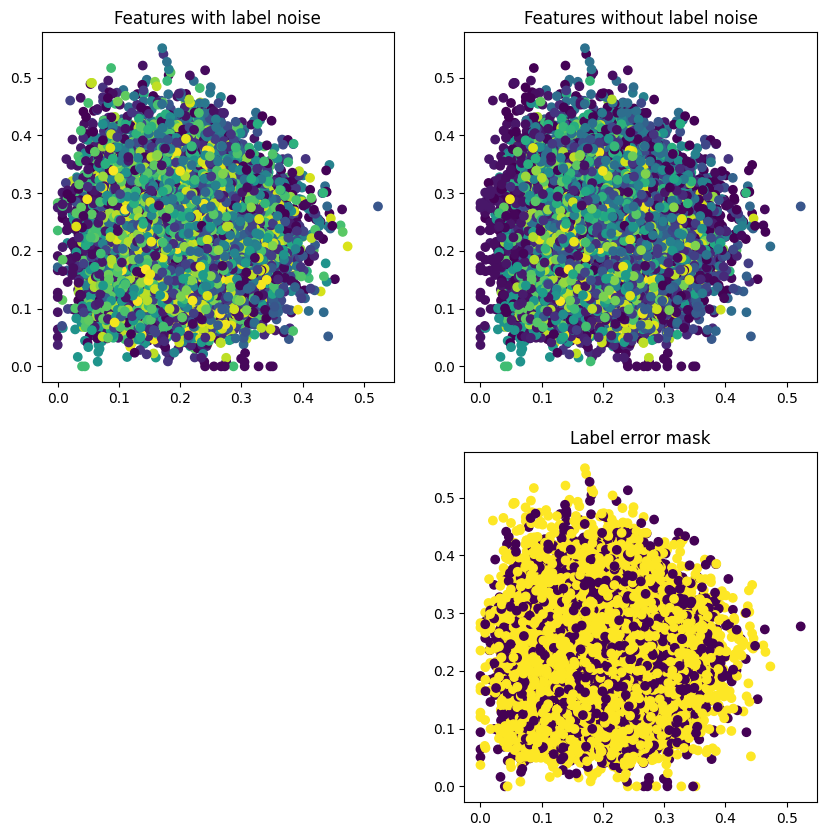

Loading data/generated/large_dataset_0000.pkl


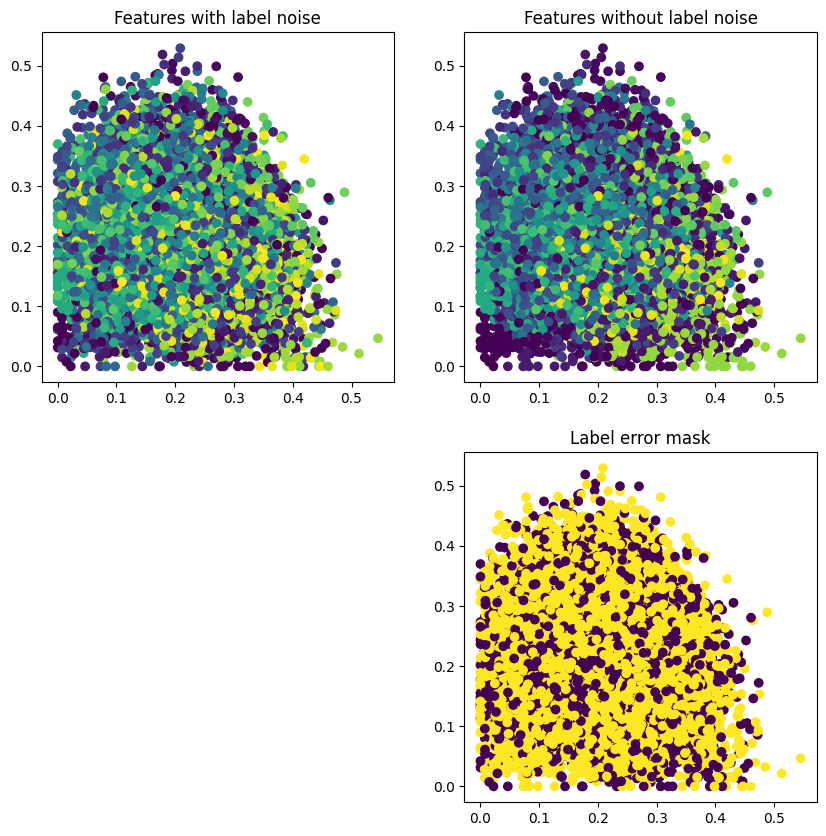

Loading data/generated/small_dataset_0003.pkl


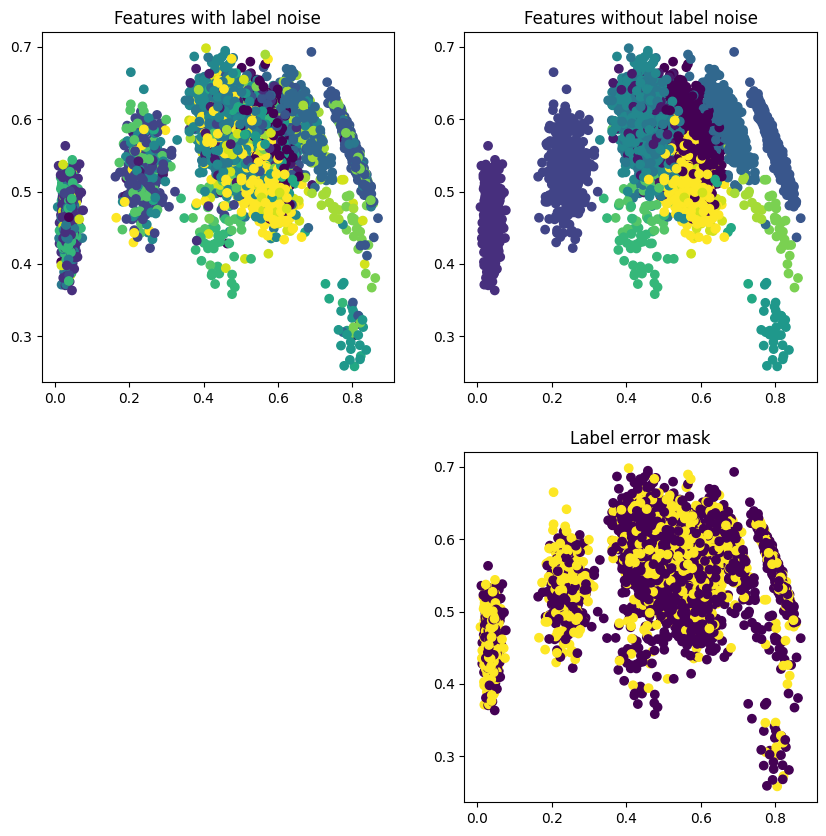

Loading data/generated/large_dataset_0008.pkl


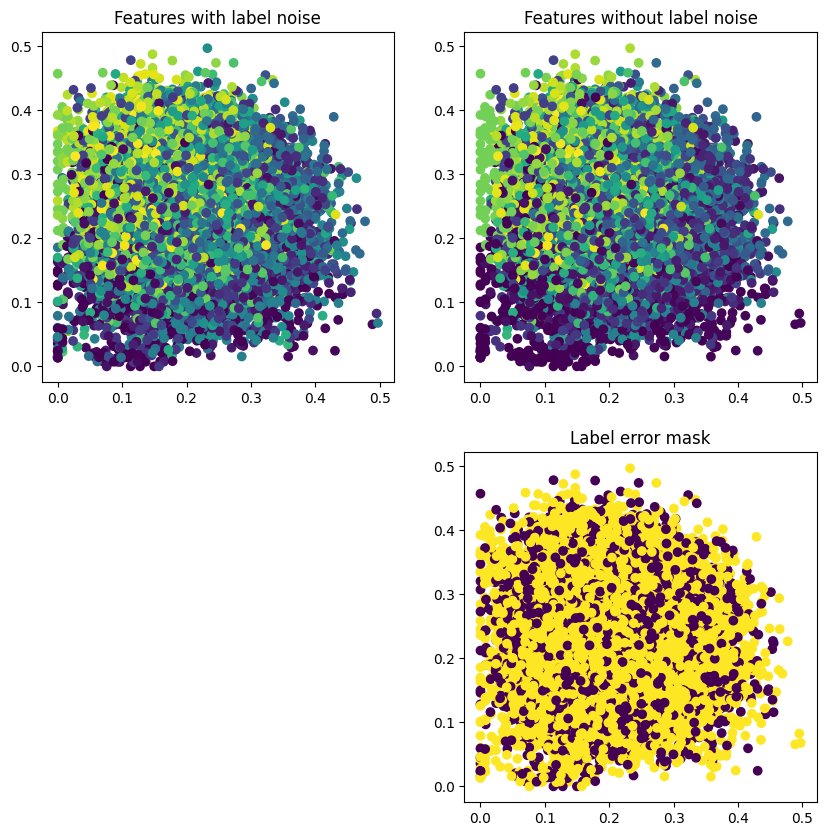

Loading data/generated/large_dataset_0007.pkl


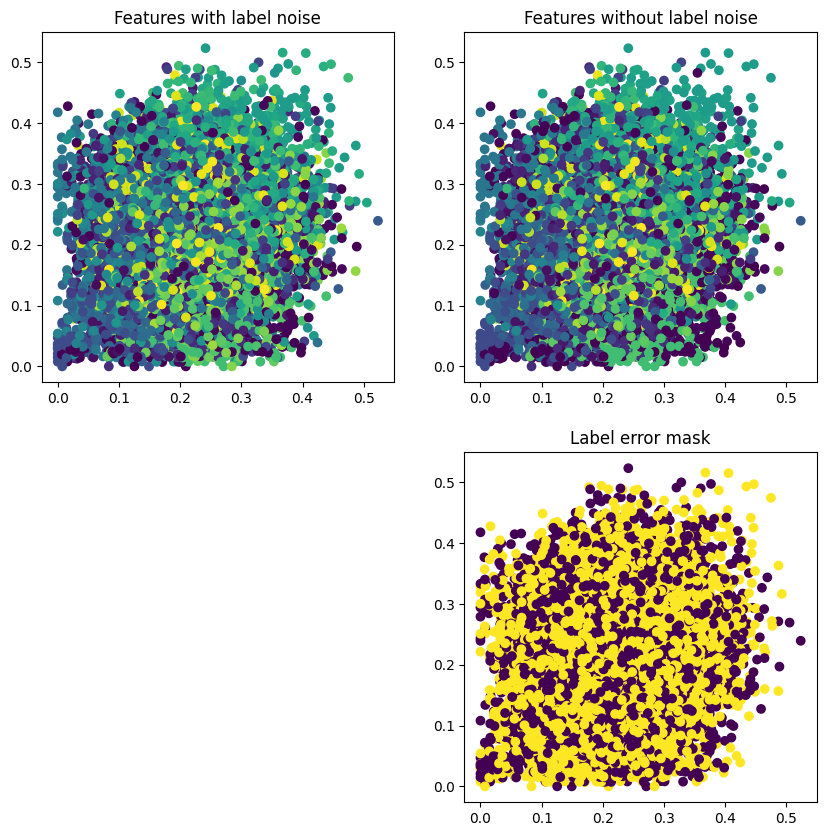

Loading data/generated/small_dataset_0009.pkl


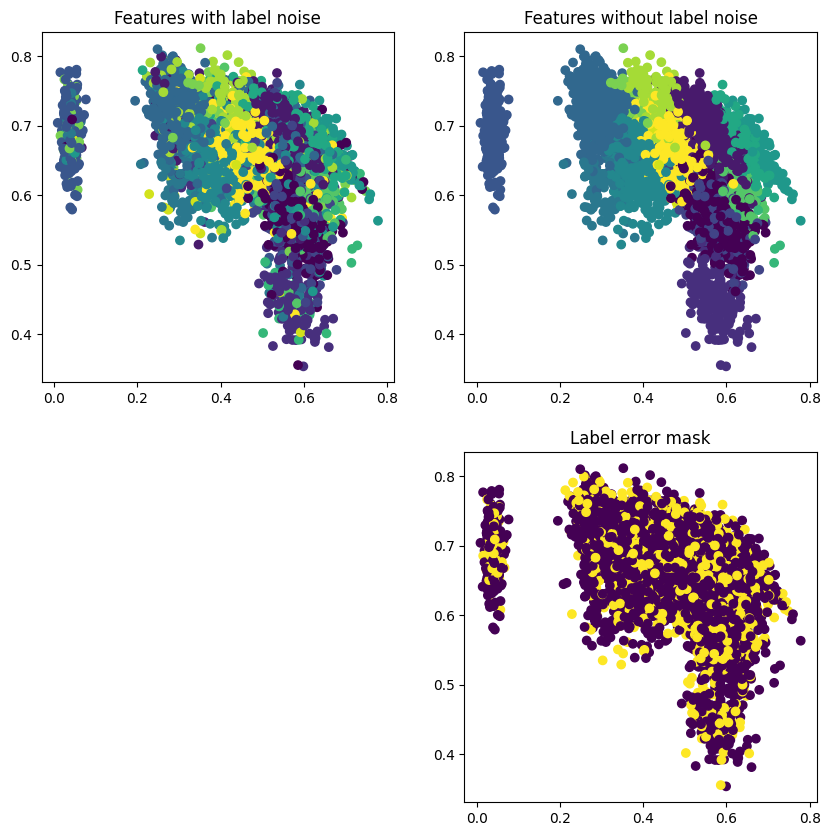

Loading data/generated/large_dataset_0009.pkl


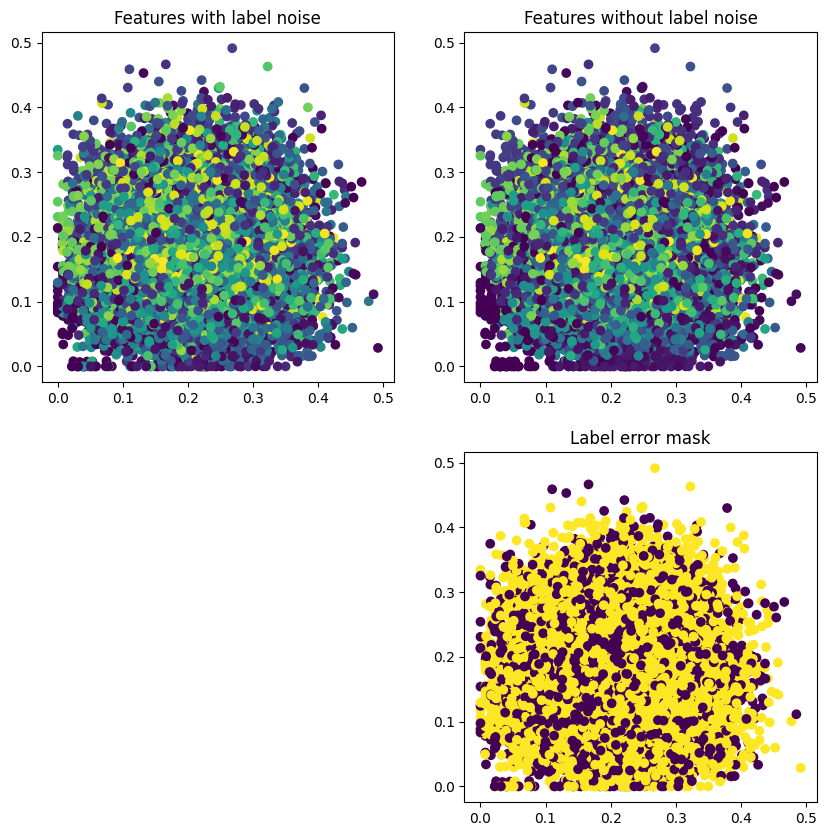

Loading data/generated/large_dataset_0004.pkl


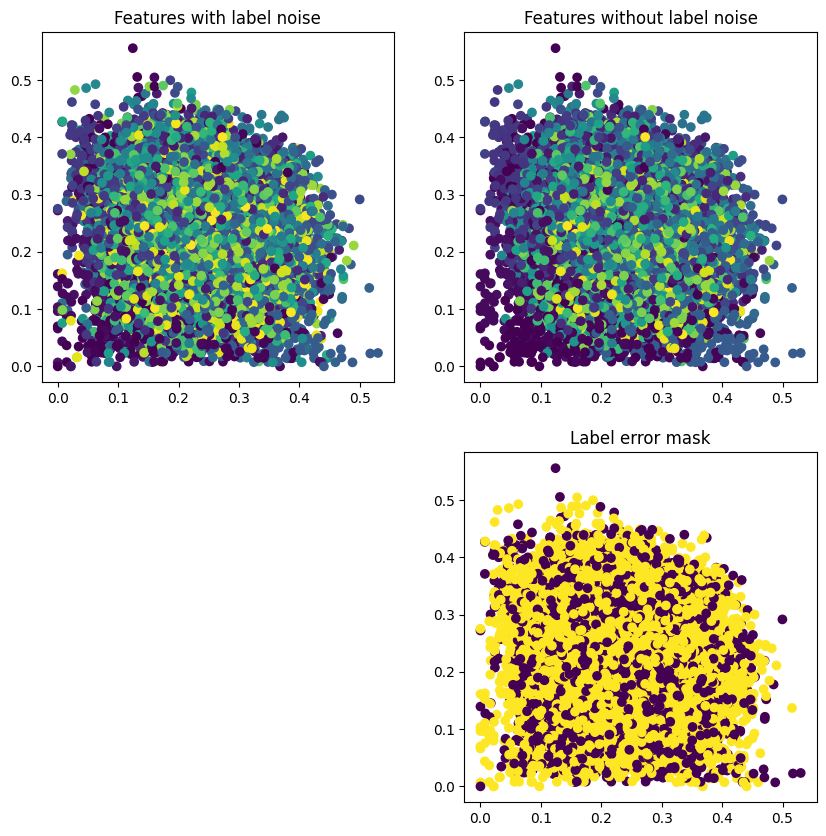

Loading data/generated/large_dataset_0006.pkl


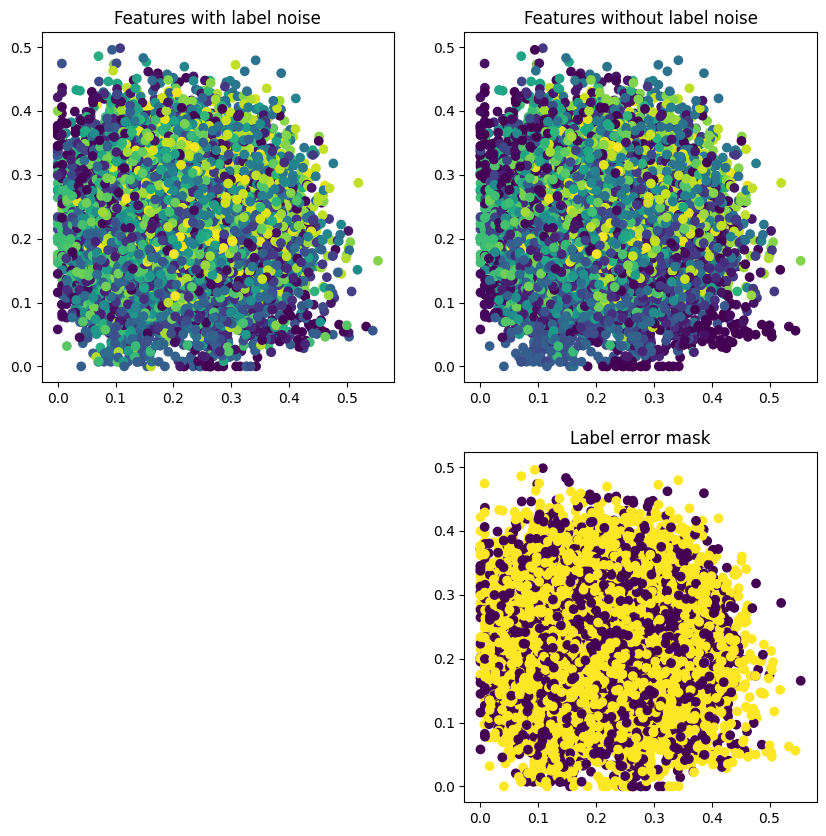

Loading data/generated/small_dataset_0001.pkl


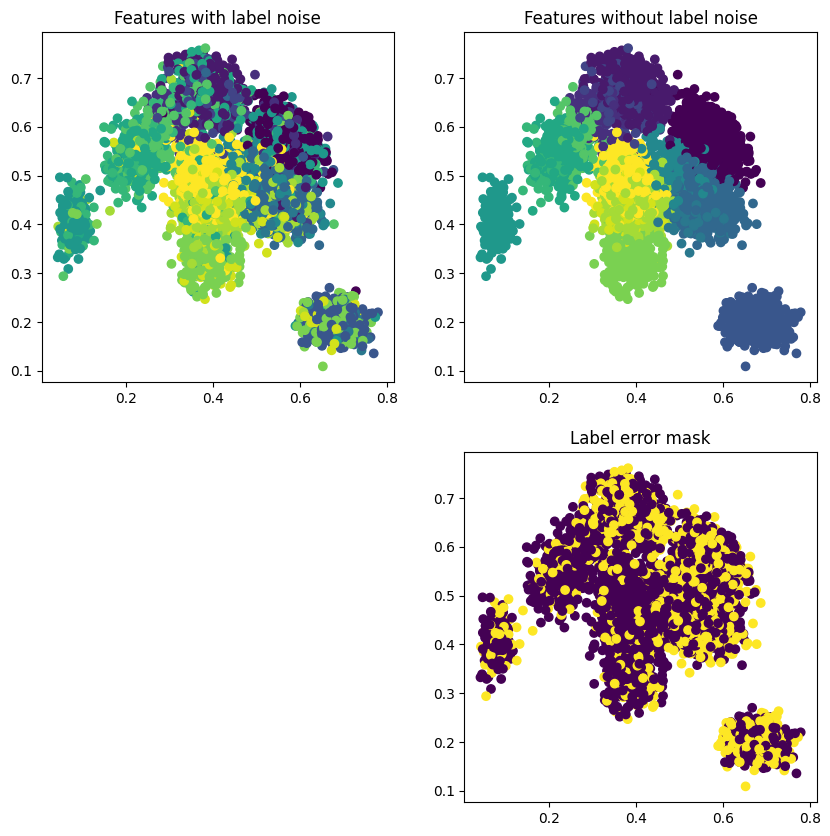

Loading data/generated/small_dataset_0000.pkl


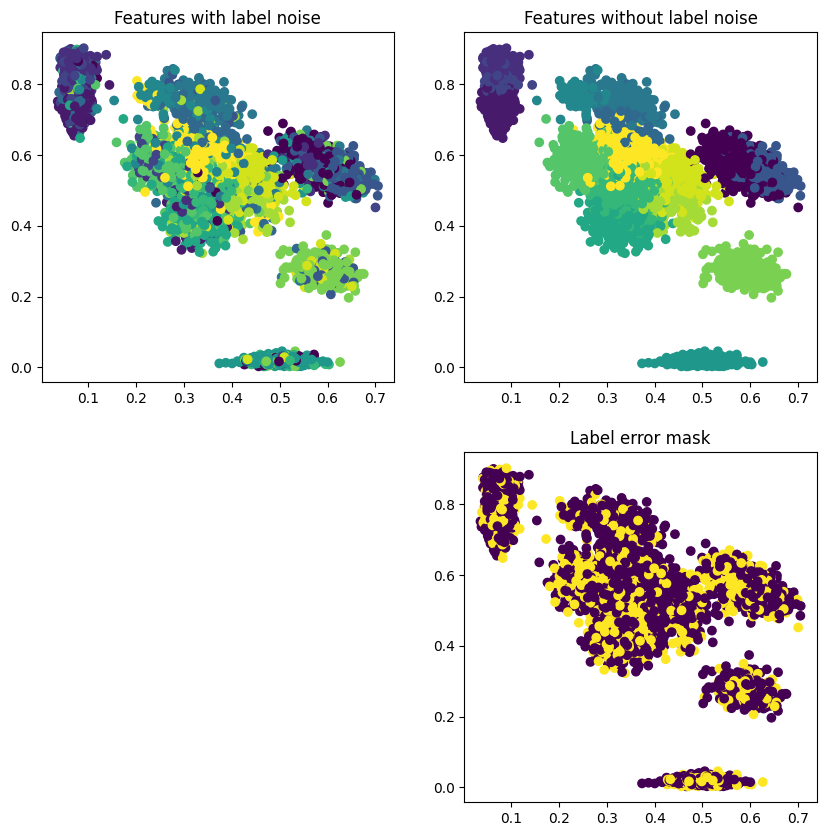

Loading data/generated/small_dataset_0002.pkl


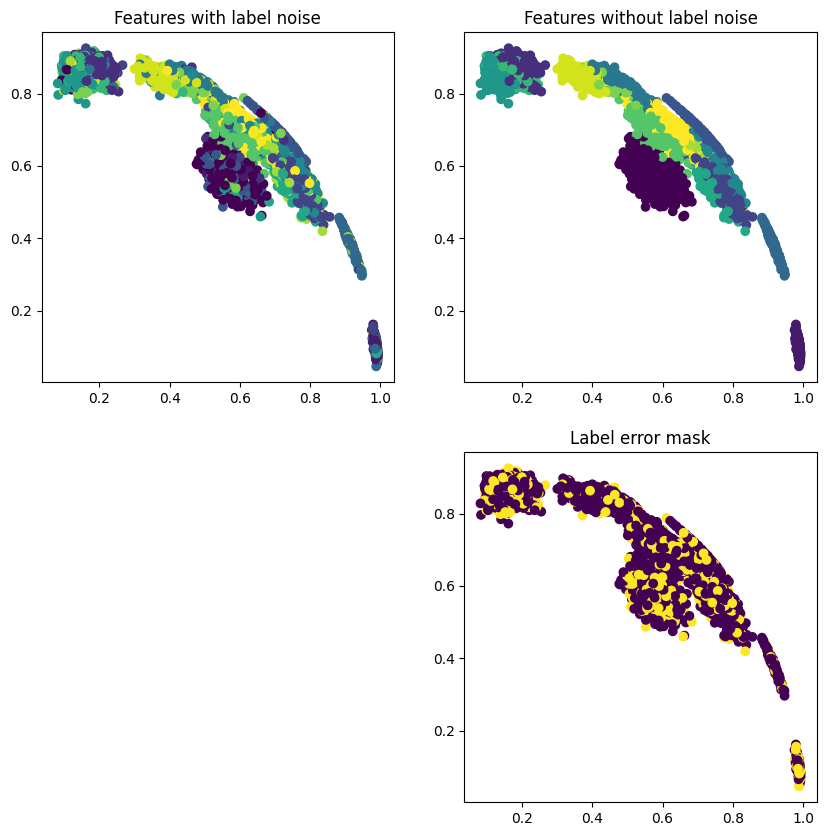

Loading data/generated/large_dataset_0002.pkl


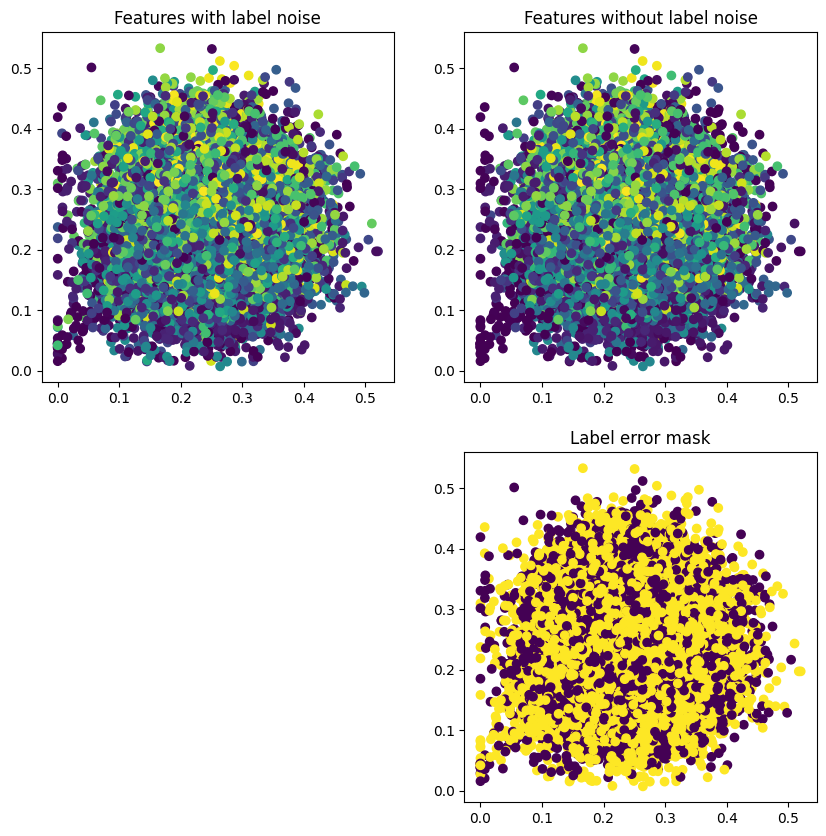

Loading data/generated/large_dataset_0001.pkl


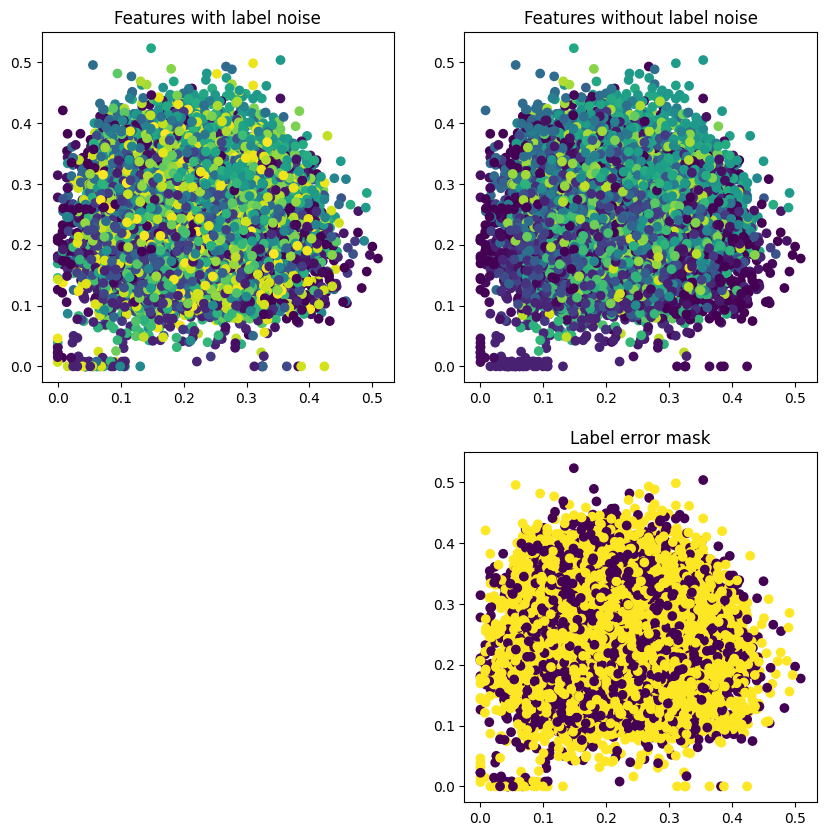

Loading data/generated/small_dataset_0007.pkl


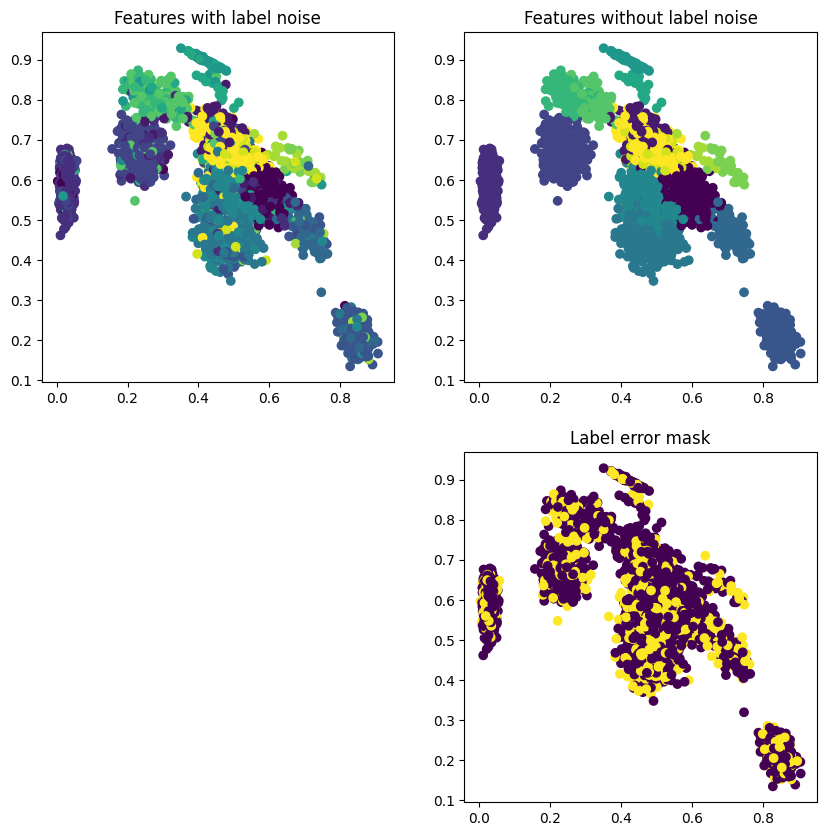

Loading data/generated/large_dataset_0003.pkl


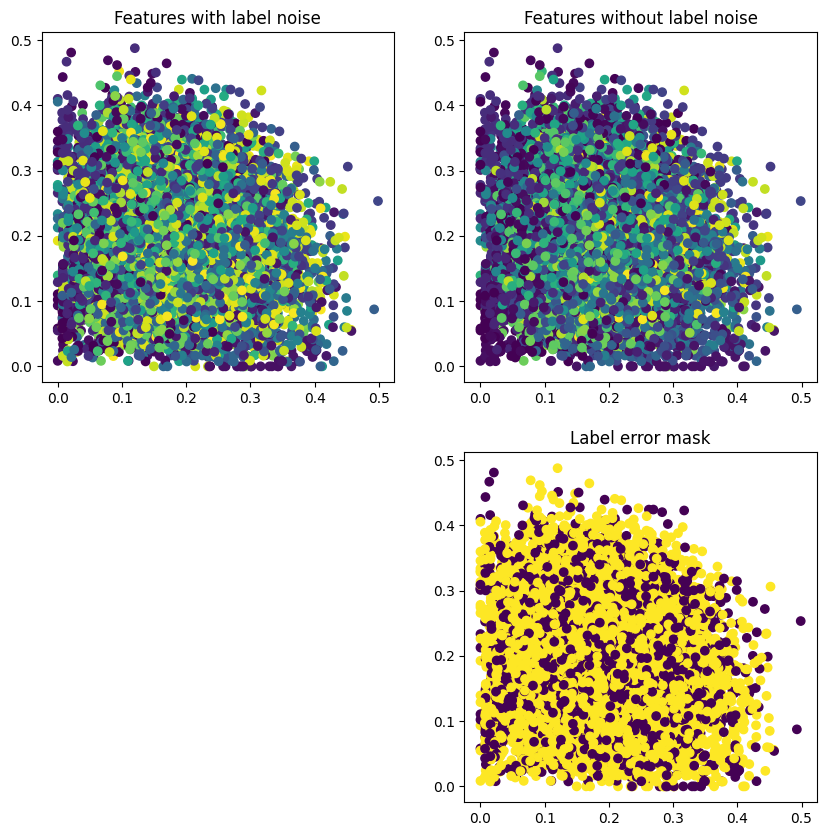

Loading data/generated/small_dataset_0005.pkl


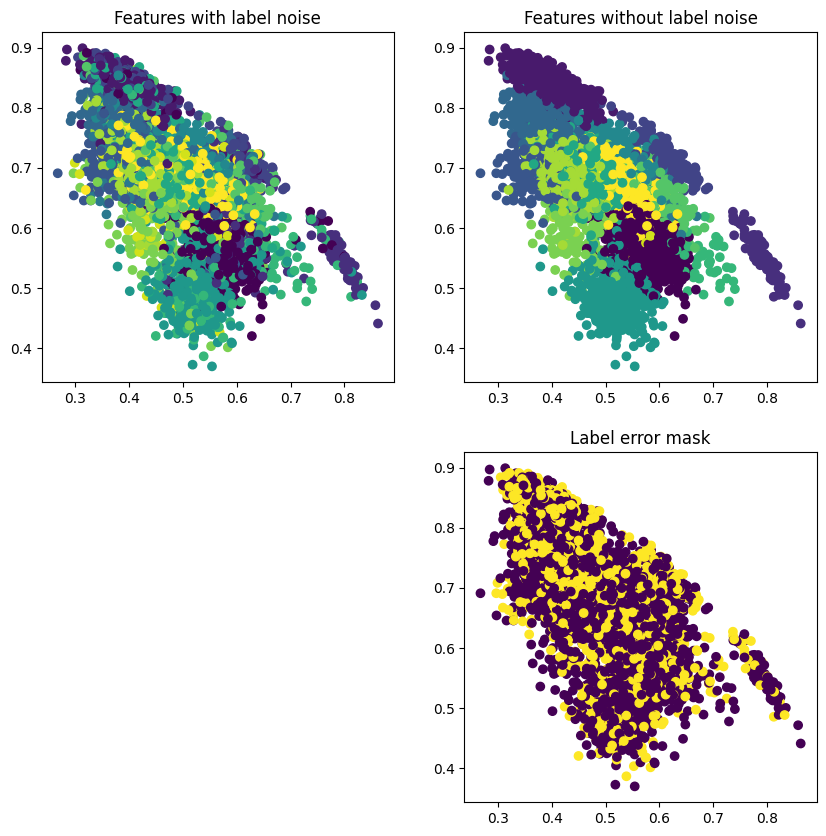

Loading data/generated/small_dataset_0008.pkl


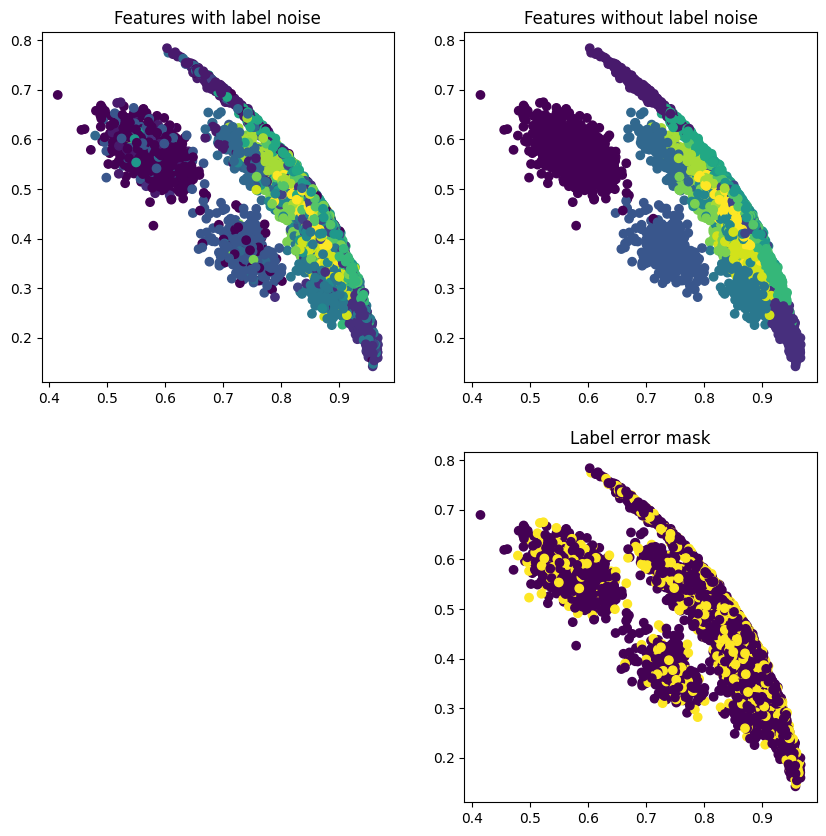

Loading data/generated/small_dataset_0006.pkl


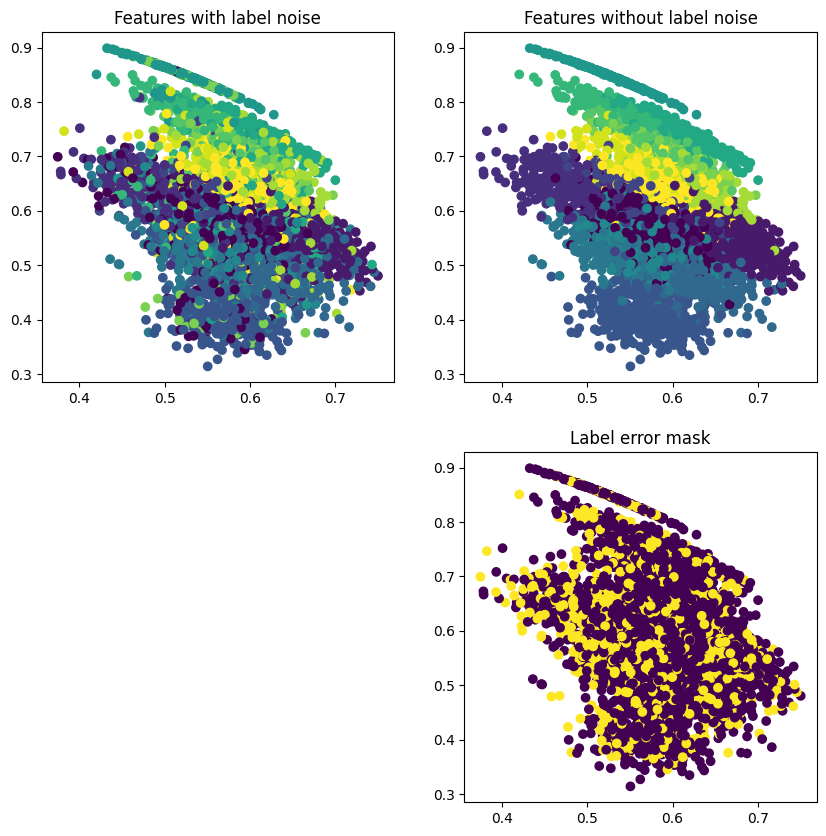

In [5]:
main(dataset_files)